## Import Library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 

mobile = pd.read_csv('automobileEDA.csv')
mobile.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# cek info dalam data

mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## 1. Pie Chart
- menyajikan data dalam bentuk prosentase & menunjukkan seberapa banyak dari setiap kategori dalam data berbanding dengan keseluruhan 
- visualisasi paling sederhana untuk menggambarkan prosentase masing-masing kategori dalam variabel 
- gunakan pie chart jika tidak terlalu banyak kategori dalam data 
- biasanya untuk visualisasi data kategori 
- contoh : untuk mengetahui prosentase penjualan tiap wilayah 

In [4]:
# menghitung frekuensi tiap kategori pada variabel body-style

mobilepie = mobile['body-style'].value_counts().to_frame()
mobilepie

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


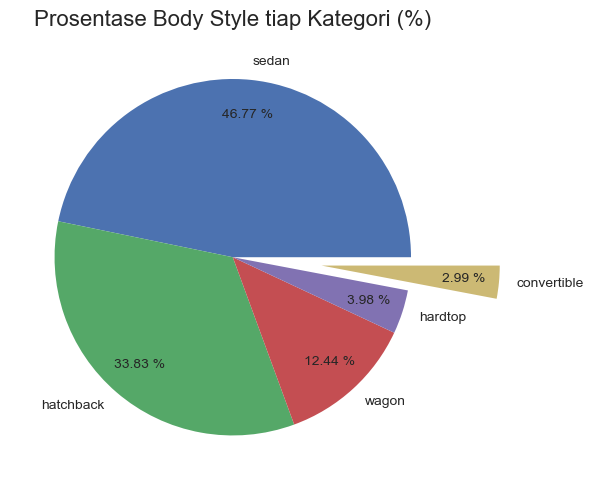

In [6]:
plt.style.use('seaborn')

plt.figure(figsize=(8,5), dpi = 100)

plt.title('Prosentase Body Style tiap Kategori (%)', size = 16)

labeling = mobilepie.index 
exploding = (0, 0, 0, 0, 0.5)

plt.pie(mobilepie['body-style'], explode = exploding, 
        labels = labeling, autopct = '%.2f %%', pctdistance = 0.8)

plt.tight_layout();


# plt.savefig('pie chart.png')

## 2. Count Plot 
- menghitung jumlah observasi di setiap kategori dan menampilkannya dalam bentuk Bar 
- gunakan count plot jika ditemukan banyak kategori dalam variabel 
- kita bisa memaknainya sebagai Histogram, tapi ini digunakan untuk menghitung frekuensi data kategori  

In [12]:
sns.set_style('whitegrid')

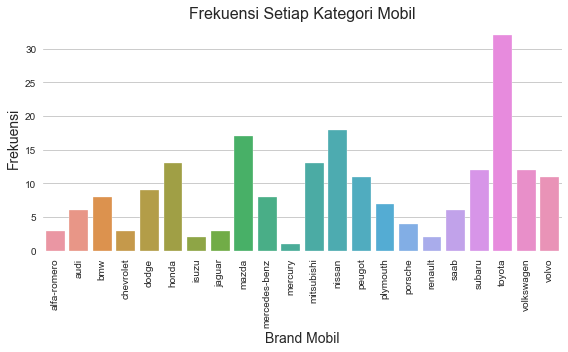

In [13]:
plt.figure(figsize=(8,5)) 

plt.title("Frekuensi Setiap Kategori Mobil", size = 16)

sns.countplot(x = 'make', data = mobile)

plt.xticks(rotation = 90)

plt.xlabel("Brand Mobil", size = 14)
plt.ylabel("Frekuensi", size = 14)

plt.tight_layout();

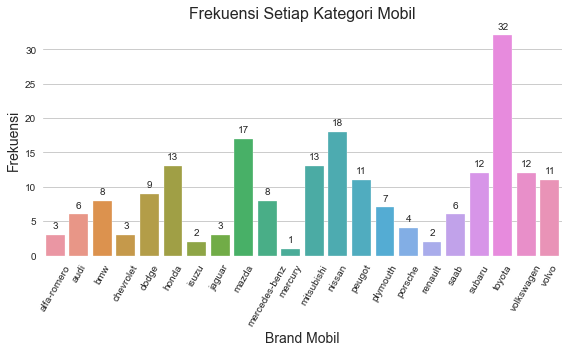

In [16]:
plt.figure(figsize=(8,5)) 

plt.title("Frekuensi Setiap Kategori Mobil", size = 16)

cplot = sns.countplot(x = 'make', data = mobile)

for p in cplot.patches:
    counter = format(p.get_height()) # anotasi angka frekuensi 
    x = p.get_x() + p.get_width() / 2 # koordinat x
    y = p.get_height() # koordinat y
    cplot.annotate(counter, # anotasi teks berupa frekuensi
                   (x,y), # titik x y untuk anotasi
                   ha = 'center', # horizontal allignment
                   va = 'center', # vertical allignment
                   xytext = (0,9), # posisi untuk meletakkan text
                  textcoords = 'offset points') # sistem koordinat teks

plt.xticks(rotation = 60)
plt.xlabel("Brand Mobil", size = 14)
plt.ylabel("Frekuensi", size = 14)

plt.tight_layout();


# plt.savefig('countplot.png')

**Descending**

In [17]:
mobile['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

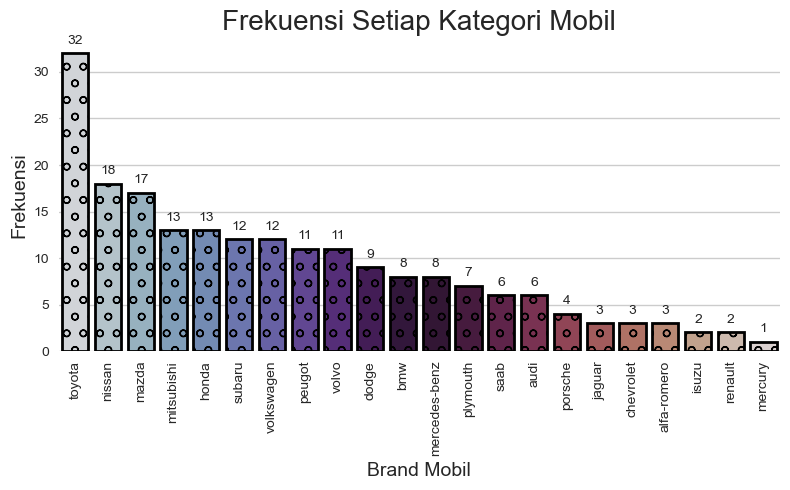

In [19]:
plt.figure(figsize=(8,5), dpi=100) 

plt.title("Frekuensi Setiap Kategori Mobil", size = 20)

cplotd = sns.countplot(x = 'make', data = mobile, 
              order = mobile['make'].value_counts().index, 
              palette = 'twilight', lw = 2, ec = 'black',
              hatch = 'o')

for p in cplotd.patches:
    counter = format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    cplotd.annotate(counter, (x, y), ha = 'center', 
                   va = 'center', xytext = (0,9), 
                  textcoords = 'offset points')

plt.xticks(rotation = 90)
plt.xlabel("Brand Mobil", size = 14)
plt.ylabel("Frekuensi", size = 14)
plt.tight_layout();

**Ascending**

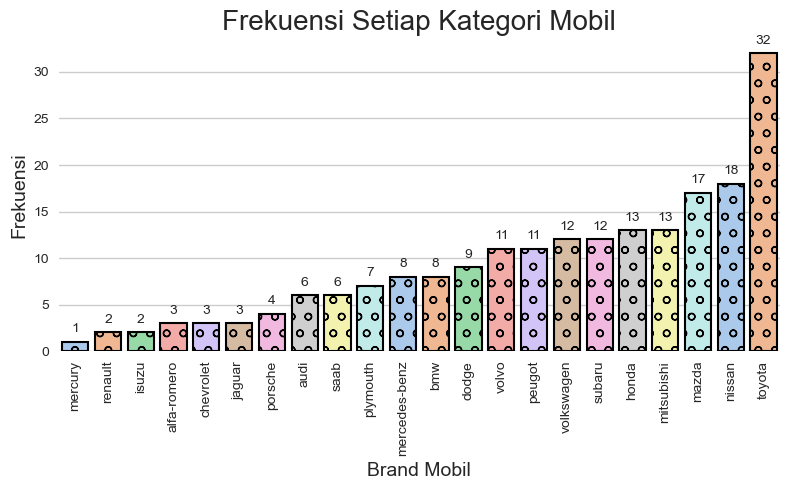

In [20]:
plt.figure(figsize=(8,5), dpi=100) 

plt.title("Frekuensi Setiap Kategori Mobil", size = 20)

cplota = sns.countplot(x = 'make', data = mobile, 
              order = mobile['make'].value_counts().index[::-1], 
              palette = 'pastel', lw = 1.5, ec = 'black',
              hatch = 'o')

for p in cplota.patches:
    counter = format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    cplota.annotate(counter, (x, y), ha = 'center', 
                   va = 'center', xytext = (0,9), 
                  textcoords = 'offset points')


plt.xticks(rotation = 90)
plt.xlabel("Brand Mobil", size = 14)
plt.ylabel("Frekuensi", size = 14)

plt.tight_layout();

## 3. Bar Plots
- visualisasi mengenai estimasi data kategori
- bisa inputkan fungsi matematis pada setiap bar 
- berguna untuk visualisasi antara data kategori terhadap data numerik 

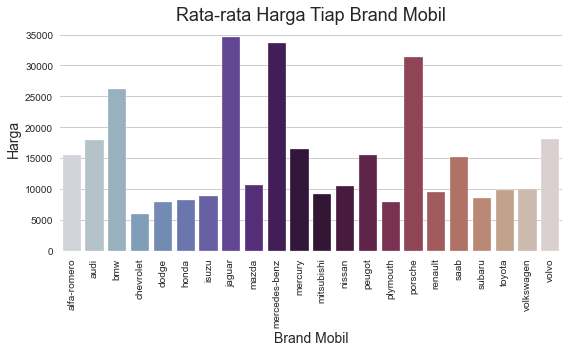

In [21]:
plt.figure(figsize=(8,5)) 

plt.title("Rata-rata Harga Tiap Brand Mobil", size = 18)

sns.barplot(x = 'make', y = 'price', data = mobile, ci = None,
            estimator = np.mean, palette = 'twilight')

plt.xticks(rotation = 90)
plt.xlabel("Brand Mobil", size = 14)
plt.ylabel("Harga", size = 14)

plt.tight_layout();

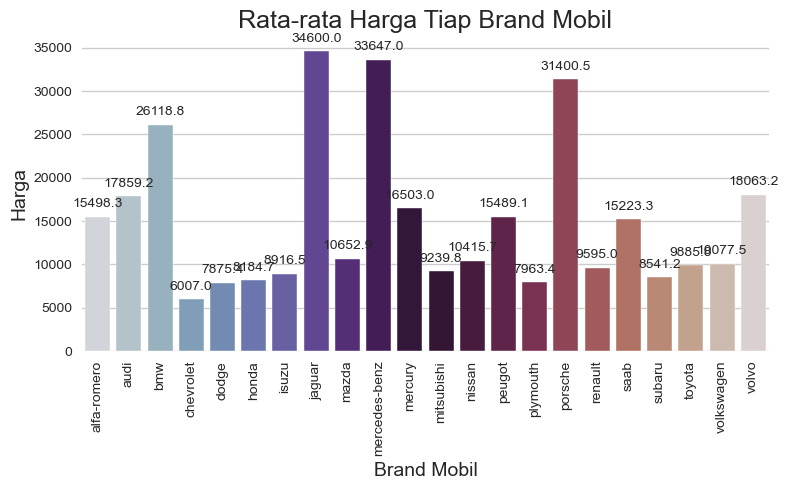

In [23]:
plt.figure(figsize=(8,5), dpi = 100) 

plt.title("Rata-rata Harga Tiap Brand Mobil", size = 18)

bplot = sns.barplot(x = 'make', y = 'price', data = mobile, ci = None,
            estimator = np.mean, palette = 'twilight')

for p in bplot.patches:
    mean = format(p.get_height(), '.1f')
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    bplot.annotate(mean, (x, y), 
                   ha = 'center', va = 'center',  
                   xytext = (0,9), 
                   textcoords = 'offset points')

plt.xticks(rotation = 90)
plt.xlabel("Brand Mobil", size = 14)
plt.ylabel("Harga", size = 14)

plt.tight_layout();

**menggunakan fungsi .annotate()**

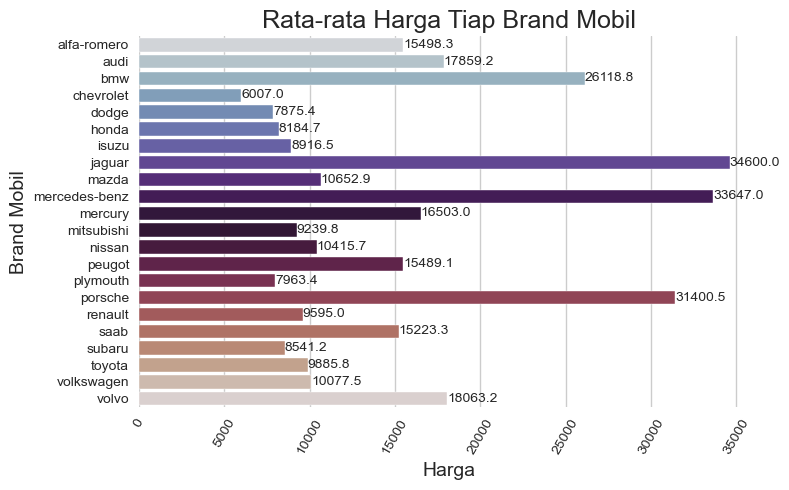

In [25]:
plt.figure(figsize=(8,5), dpi = 100) 

plt.title("Rata-rata Harga Tiap Brand Mobil", size = 18)

bplotv = sns.barplot(x = 'price', y = 'make', data = mobile, ci = None,
            estimator = np.mean, palette = 'twilight')

for p in bplotv.patches:
    mean = format(p.get_width(), '.1f')
    x = p.get_width() + 3
    y = p.get_y() + p.get_height() / 2
    bplotv.annotate(mean, (x, y), va = 'center')

plt.xticks(rotation = 60)
plt.xlabel("Harga", size = 14)
plt.ylabel("Brand Mobil", size = 14)

plt.tight_layout();

In [26]:
mobile.groupby('make').price.mean()

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

**menggunakan fungsi .text()**

**bar plot untuk kategori mobil berdasarkan drive-wheels**

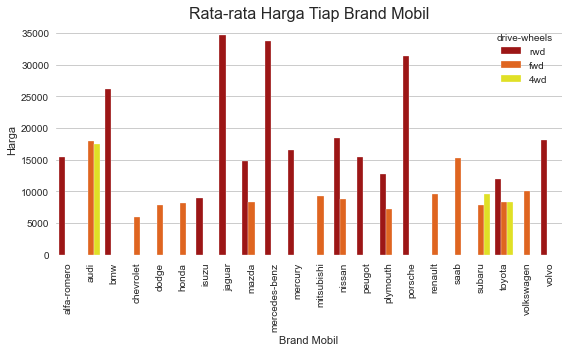

In [16]:
plt.figure(figsize=(8,5)) 

plt.title("Rata-rata Harga Tiap Brand Mobil", size = 16)

sns.barplot(x = 'make', y = 'price', data = mobile, ci = None, 
            palette = 'hot', hue = 'drive-wheels')

plt.xticks(rotation = 90)
plt.xlabel("Brand Mobil")
plt.ylabel("Harga")

plt.tight_layout();

**Kesimpulan mengenai Perbedaan Count Plot dan Bar Plot** 
- Count plot lebih fokus pada perhitungan frekuensi untuk menghitung data kategori 
- Bar plot lebih fokus pada perhitungan statistik deskriptif (misalnya menghitung rata-rata harga dari tiap kategori)

## 5. Scatter Plot
- untuk mengetahui hubungan 2 variabel
- ketika membangun scatter plot, kita bisa melihat trend positif / trend negatif, kenormalan data, dan mendeteksi outlier
- visualisasi untuk antar variabel dengan tipe data numerik

**scatter plot antara city-mpg & highway-mpg**

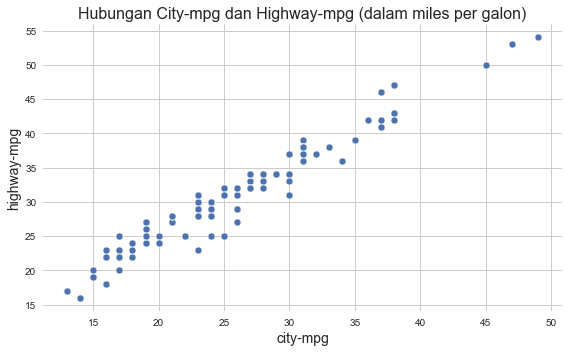

In [28]:
plt.figure(figsize = (8,5))

plt.title('Hubungan City-mpg dan Highway-mpg (dalam miles per galon)', size = 16)

sns.scatterplot(x = 'city-mpg', y = 'highway-mpg', data = mobile)

plt.xlabel('city-mpg', size = 14)
plt.ylabel('highway-mpg', size = 14)

plt.tight_layout();

**Interpretasi :**
- gambar diatas menunjukkan trend positif antara city-mpg dan highway-mpg 
- ketika city-mpg nilainya besar, maka highway-mpg juga memberikan angka yang besar 

**scatter plot antara city-mpg & highway-mpg berdasarkan horsepower-binned**

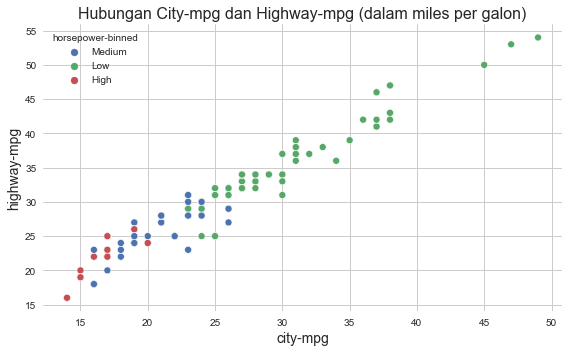

In [29]:
plt.figure(figsize = (8,5))

plt.title('Hubungan City-mpg dan Highway-mpg (dalam miles per galon)', size = 16)

sns.scatterplot(x = 'city-mpg', y = 'highway-mpg', 
                hue = 'horsepower-binned', data = mobile)

plt.xlabel('city-mpg', size = 14)
plt.ylabel('highway-mpg', size = 14)

plt.tight_layout();

**interpretasi :**
- ketika horsepower-binned **high**, maka city-mpg & highway-mpg **rendah** 
- ketika horsepower-binned **medium**, maka city-mpg & highway-mpg **sedang** 
- ketika horsepower-binned **low**, maka city-mpg & highway-mpg **tinggi** 

**scatter plot antara city-mpg & highway-mpg dengan marker**

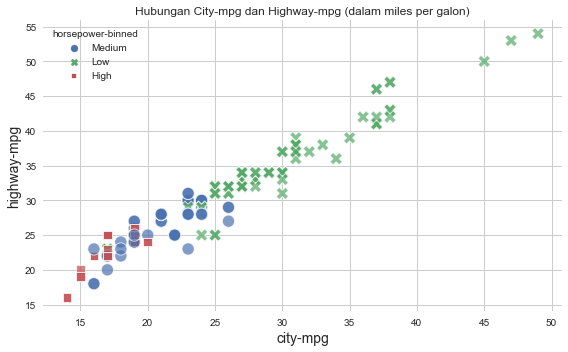

In [31]:
plt.figure(figsize = (8,5))

plt.title('Hubungan City-mpg dan Highway-mpg (dalam miles per galon)')

sns.scatterplot(x = 'city-mpg', y = 'highway-mpg', hue = 'horsepower-binned', 
                style = 'horsepower-binned' , data = mobile, s = 150, alpha = 0.7)

plt.xlabel('city-mpg', size = 14)
plt.ylabel('highway-mpg', size = 14)

plt.tight_layout();

**scatter plot antara city-mpg & highway-mpg berdasarkan compression-ratio**

## 6. Histogram
- ada 3 fungsi untuk memvisualisasikan distribusi data dengan menggunakan seaborn, meliputi : histplot, displot, dan ecdfplot
- visualisasi mengenai distribusi data numerik & frekuensi data numerik pada interval tertentu
- bisa dimaknai sebagai bar plot, tetapi bedanya adalah barplot untuk data kategori, sedangkan histogram untuk data numerik

**Univariate Histogram : Distribusi Harga Mobil**

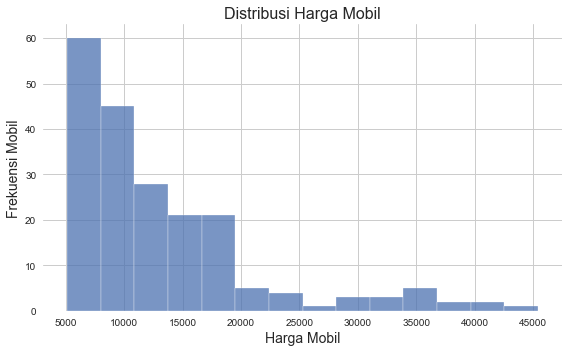

In [32]:
plt.figure(figsize = (8,5))

plt.title('Distribusi Harga Mobil', size = 16)

histo = sns.histplot(x = 'price', data = mobile)

plt.xlabel('Harga Mobil', size = 14)
plt.ylabel('Frekuensi Mobil', size = 14)

plt.tight_layout();

**Histogram dengan anotasi frekuensi pada tiap bar & anotasi mean**

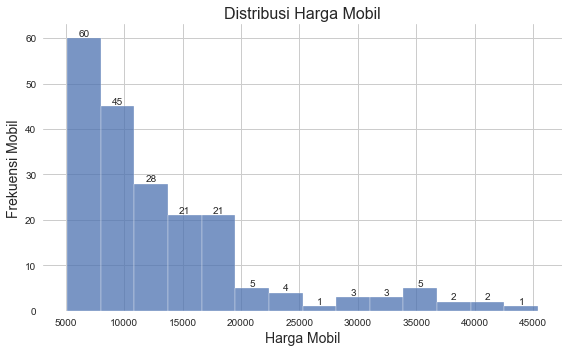

In [35]:
plt.figure(figsize = (8,5))

plt.title('Distribusi Harga Mobil', size = 16)

histo = sns.histplot(x = 'price', data = mobile)

# text untuk frekuensi tiap bar
for p in histo.patches:
    height = p.get_height()
    histo.text(x = p.get_x()+(p.get_width()/2), 
              y = height + 0.5, 
              s = '{:.0f}'.format(height), 
              ha = 'center')

plt.xlabel('Harga Mobil', size = 14)
plt.ylabel('Frekuensi Mobil', size = 14)


plt.tight_layout();

**Histogram dengan interval yang ditentukan sendiri**

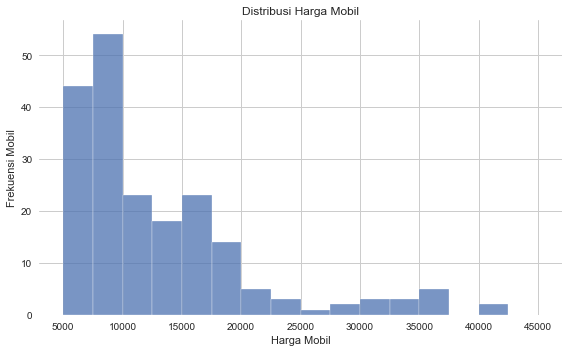

In [36]:
sns.set_style('whitegrid')

plt.figure(figsize = (8,5))

plt.title('Distribusi Harga Mobil')

binning = [5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000]

sns.histplot(x = 'price', data = mobile, bins = binning)

plt.xlabel('Harga Mobil')
plt.ylabel('Frekuensi Mobil')

plt.tight_layout();

**Histogram berdasarkan kategori num-of-doors dan dilengkapi line distribution**

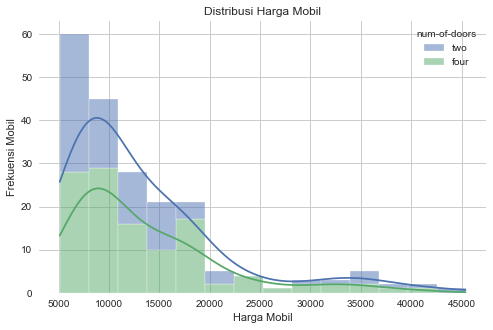

In [38]:
plt.figure(figsize = (8,5))

plt.title('Distribusi Harga Mobil')

sns.histplot(x = 'price', data = mobile, 
             hue = 'num-of-doors', multiple = 'stack', kde = True)

plt.xlabel('Harga Mobil')
plt.ylabel('Frekuensi Mobil')

plt.tight_layout;

## 7. Heatmap
- untuk memvisualisasikan cross tabulation data baik untuk count / mean / median / fungsi lainnya pada masing-masing kategori 
- digunakan untuk visualisasi antar data kategori / data kategori dengan data numerik
- heatmap menggambarkan value pada masing-masing kategori yang direpresentasikan dengan warna 
- sebelum membuat heatmap , pastikan untuk membuat pivotable (data kategori dgn data numerik) / cross tabulation (data kategori dgn data kategori) terlebih dahulu 

**pivot table untuk mengetahui rata-rata harga mobil berdasarkan body-style dan drive-wheels**

In [39]:
# buat data pivot table data dulu 

mobile.pivot_table(values = 'price', index = 'drive-wheels', columns = 'body-style', aggfunc = 'mean')

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,NaN,NaN,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


**Interpretasi :**
- dari data privotable diatas, dapat disimpulkan bahwa ditemukan **missing value** pada kategori `convertible & hardtop dengan drive-wheels 4wd` 
- dari situ, dapat juga diperoleh kesimpulan bahwa mobil **tidak ditemukan** mobil dengan kategori `convertible & hardtop serta drive-wheels 4wd`
- karena tidak ditemukan mobil dengan tipe tersebut, maka kita **tidak bisa menghitung rata-rata tipe mobil yang dimaksud** 
- oleh sebab itu, supaya heatmap tetap utuh, maka missing value dalam tabel diubah jadi 0

**pivot table yang baru**

In [40]:
# isi missing value dengan 0

mobilepivot = mobile.pivot_table(values = 'price', index = 'drive-wheels', columns = 'body-style', aggfunc = 'mean', fill_value = 0.0)
mobilepivot

body-style,convertible,hardtop,hatchback,sedan,wagon
drive-wheels,,,,,
4wd,0.0,0.000000,7603.000000,12647.333333,9095.750000
fwd,11595.0,8249.000000,8396.387755,9811.800000,9997.333333
rwd,23949.6,24202.714286,14337.777778,21711.833333,16994.222222


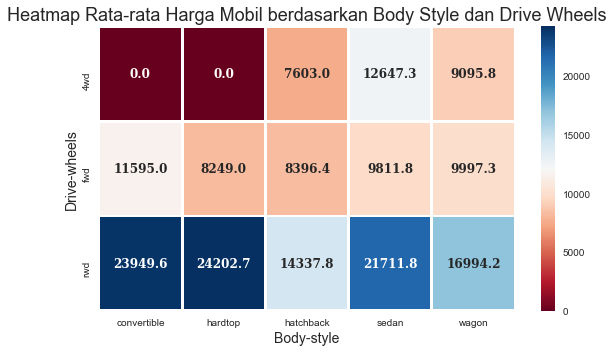

In [41]:
plt.figure(figsize = (8,5))

plt.title('Heatmap Rata-rata Harga Mobil berdasarkan Body Style dan Drive Wheels', size = 18)

sns.heatmap(mobilepivot, 
            cmap = 'RdBu',
            annot = True,
            linewidth = 2,
            fmt = ".1f", annot_kws = {
                'fontsize': 12, 
                'fontweight': 'bold', 
                'fontfamily': 'serif'
            })

plt.xlabel('Body-style', size = 14)
plt.ylabel('Drive-wheels', size = 14)

plt.tight_layout();

**interpretasi :**
- mobil dengan **harga tertinggi** ditandai dengan **warna biru pekat** yaitu mobil dengan **tipe convertible dan drive-wheels rwd**
- mobil dengan **harga sedang ditandai** dengan **warna pinky terang** yaitu mobil dengan **tipe wagon dan drive-wheels fwd**
- mobil dengan **harga terendah ditandai** dengan **warna pinky pekat** yaitu mobil dengan **tipe hatchback dan drive-wheels 4wd** 
- mobil yang **tidak ada harga** karena tipe tersebut **tidak tersedia** ditandai dengan **warna merah pekat**

## 8. Box Plot
- berguna untuk memvisualisasikan distribusi data dan statistik deskriptif secara bersamaan
- dapat untuk mendeteksi outlier pada tiap variabel bertipe data numerik
- boxplot dibangun dari rumus Tukey Fences (IQR)
- boxplot dapat dimaknai sebagai visualisasi mengenai distribusi data pada masing-masing kategori 

**Boxplot Harga Mobil berdasarkan Kategori Body-style**

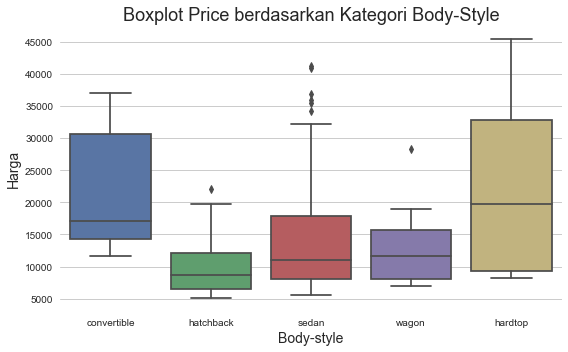

In [42]:
sns.set_style('whitegrid')

plt.figure(figsize = (8,5))

plt.title('Boxplot Price berdasarkan Kategori Body-Style', size = 18)

sns.boxplot(x = 'body-style', y = 'price', data = mobile)

plt.xlabel('Body-style', size = 14)
plt.ylabel('Harga', size = 14)

plt.tight_layout();

**notes :**
- terdapat **outlier** yang ditemukan pada mobil dengan **body-style hatchback, sedan, & wagon**
- mobil dengan body-style **hardtop** dinilai **lebih mahal** dibandingkan kategori **body-style lainnya** 

**Boxplot Harga Mobil berdasarkan Kategori Body style dan Num-of-doors**

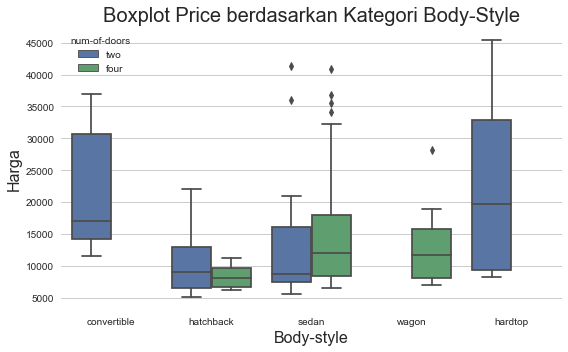

In [43]:
plt.figure(figsize = (8,5))

plt.title('Boxplot Price berdasarkan Kategori Body-Style', size = 20)

sns.boxplot(x = 'body-style', y = 'price', hue = 'num-of-doors', data = mobile)

plt.xlabel('Body-style', size = 16)
plt.ylabel('Harga', size = 16)

plt.tight_layout();

**interpretasi :** 
- mobil yang body-stylenya **hardtop dengan 2 pintu**, dinilai **lebih mahal** dari kategori body-style apapun 

**Boxplot dengan Kriteria Horsepower > 150**

In [25]:
mobile['high_horsepower'] = mobile.horsepower > 150

In [26]:
mobile.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,high_horsepower
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1,False
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1,False
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1,False
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1,False


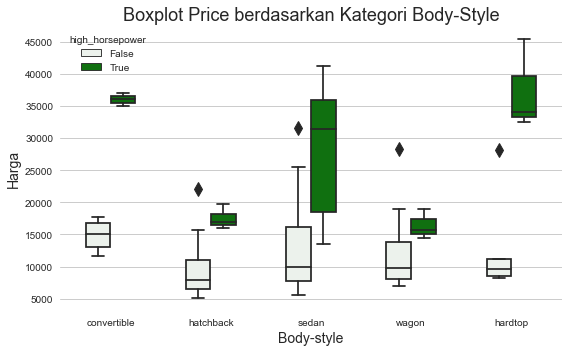

In [27]:
plt.figure(figsize = (8,5))

plt.title('Boxplot Price berdasarkan Kategori Body-Style', size = 18)

sns.boxplot(x = 'body-style', y = 'price', 
            hue = 'high_horsepower',  
            data = mobile, color = 'g', 
            width = 0.5, fliersize = 10)

plt.xlabel('Body-style', size = 14)
plt.ylabel('Harga', size = 14)

plt.tight_layout();

**notes :** 
- terdapat **outlier** yang ditemukan pada mobil dengan body-style **hatchback, sedan, wagon, & hardtop** ketika **horsepowernya tinggi**
- mobil dengan **horsepower yang tinggi dinilai lebih mahal dari pada horsepower yang rendah** pada keseluruhan tipe body-style 

## 9. Correlation Plot
- untuk mengetahui korelasi antar data numerik, bisa mengguanakan regplot
- regplot berguna untuk mengetahui hubungan linear antar variabel 
- regplot adalah gabungan dari scatter plot dan linear plot

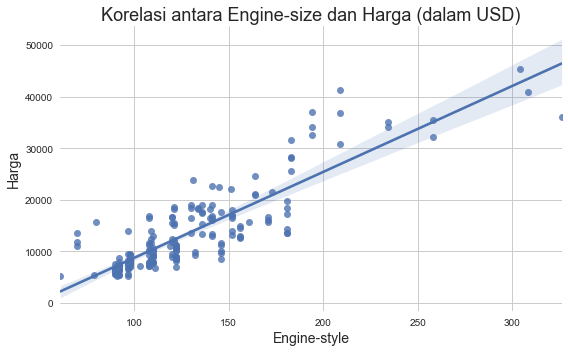

In [44]:
plt.figure(figsize = (8,5))

plt.title('Korelasi antara Engine-size dan Harga (dalam USD)', size = 18)

sns.regplot(x = 'engine-size', y = 'price', data = mobile)

plt.xlabel('Engine-style', size = 14)
plt.ylabel('Harga', size = 14)

plt.tight_layout();

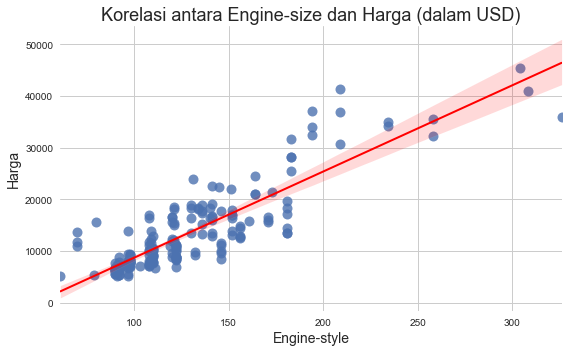

In [45]:
plt.figure(figsize = (8,5))

plt.title('Korelasi antara Engine-size dan Harga (dalam USD)', size = 18)

sns.regplot(x = 'engine-size', y = 'price', data = mobile,
            scatter_kws = {
                's' : 100
            },
            line_kws = {
               'lw': 2, 
               'color': 'red'
           })

plt.xlabel('Engine-style', size = 14)
plt.ylabel('Harga', size = 14)

plt.tight_layout();

**notes :** 
- terdapat **hubungan positif** antara `engine-size` dan `price` 

## 4. Line Plot 
- menggambarkan hubungan kontinu antara 2 values 
- untuk melihat trend atau seasonality 

In [47]:
gas = pd.read_csv('gas_prices.csv')
gas.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


**Line Plot menggunakan Matplotlib untuk Tren Harga Bensin di USA, Canada, dan Korea**

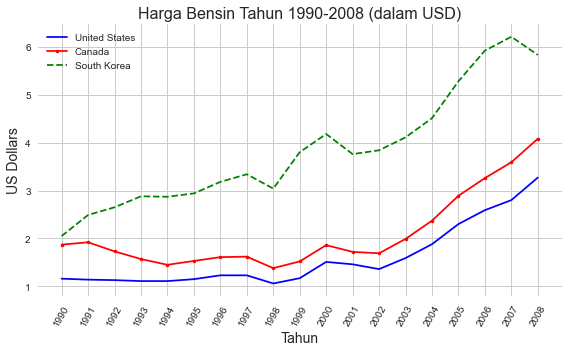

In [48]:
plt.figure(figsize = (8,5))

plt.title('Harga Bensin Tahun 1990-2008 (dalam USD)', size = 16)

plt.plot(gas.Year, gas.USA, 'b', label = 'United States')
plt.plot(gas.Year, gas.Canada,'r.-', label = 'Canada')
plt.plot(gas.Year, gas['South Korea'],'g--', label = 'South Korea')

plt.xticks(gas.Year, rotation = 60)


plt.xlabel('Tahun', size = 14)
plt.ylabel('US Dollars', size = 14)

# untuk memunculkan label
plt.legend()

plt.tight_layout(); 

**Line Plot menggunakan Seaborn untuk Mengetahui Tren Harga Bensin Semua Negara**

In [49]:
gasdf = pd.melt(gas, 'Year', var_name = 'Country', value_name = 'Price')
gasdf.head()

,Year,Country,Price
0,1990,Australia,NaN
1,1991,Australia,1.96
2,1992,Australia,1.89
3,1993,Australia,1.73
4,1994,Australia,1.84


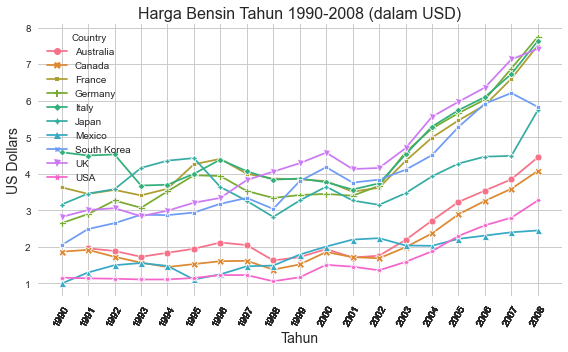

In [50]:
plt.figure(figsize = (8,5))

plt.title('Harga Bensin Tahun 1990-2008 (dalam USD)', size = 16)

sns.lineplot(x = 'Year', y = 'Price', data = gasdf, 
            hue = 'Country', style = 'Country', 
            dashes = False, markers = True)

plt.xticks(gasdf.Year, rotation = 60)

plt.xlabel('Tahun', size = 14)
plt.ylabel('US Dollars', size = 14)

plt.tight_layout();

**Line Plot menggunakan Seaborn untuk Tren Harga Bensin di USA, Canada, dan Korea**

In [53]:
selected = gasdf[gasdf.Country.isin(['USA', 'Canada', 'South Korea'])]
selected.head()

,Year,Country,Price
19,1990,Canada,1.87
20,1991,Canada,1.92
21,1992,Canada,1.73
22,1993,Canada,1.57
23,1994,Canada,1.45


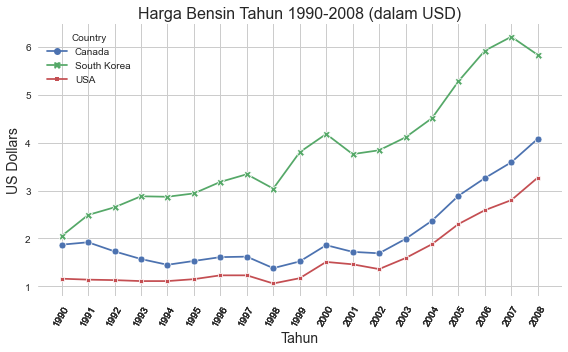

In [54]:
plt.figure(figsize = (8,5))

plt.title('Harga Bensin Tahun 1990-2008 (dalam USD)', size = 16)

sns.lineplot(x = 'Year', y = 'Price', data = selected, 
            hue = 'Country', style = 'Country', 
            dashes = False, markers = True)

plt.xticks(selected.Year, rotation = 60)

plt.xlabel('Tahun', size = 14)
plt.ylabel('US Dollars', size = 14)

plt.tight_layout();

**Line Plot dilengkapi dengan anotasi harga tiap titik**

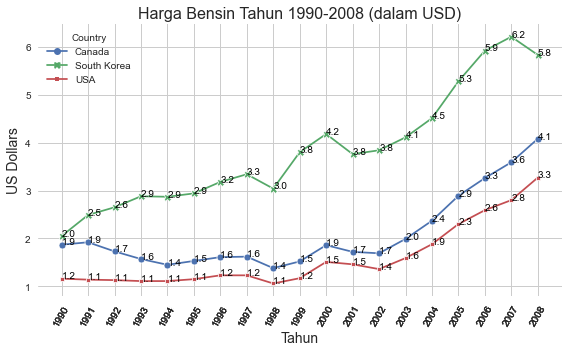

In [55]:
plt.figure(figsize = (8,5))

plt.title('Harga Bensin Tahun 1990-2008 (dalam USD)', size = 16)

sns.lineplot(x = 'Year', y = 'Price', data = selected, 
            hue = 'Country', style = 'Country', 
            dashes = False, markers = True)

for x, y in zip(selected['Year'], selected['Price']):
    plt.text(x = x, y = y, # koordinat x dan y
            s = '{:.1f}'.format(y), # anotasi harga sesuai dengan dataframe selected dan kolom price
            color = 'black') # warna text anotasi

plt.xticks(selected.Year, rotation = 60)

plt.xlabel('Tahun', size = 14)
plt.ylabel('US Dollars', size = 14)

plt.tight_layout();